<h1> Quantum measurements, Heisenberg's uncertainty principle and Bell inequalities </h1>

<h2>Simulating a measurement on a qubit</h2>

<h3>We import all the required libraries</h3>

We also import some extra ones just in case

In [9]:
%matplotlib inline
#from IPython.display import display
import matplotlib.pyplot as plt
from numpy import sqrt,pi,cos,sin,arange,random,real,imag
import numpy as np
import random
from numpy.linalg import eig
from qutip import *
plt.rcParams["figure.figsize"] = (12,9)

<h3> We define the operators to be measured </h3>

In [2]:
# Define the Phv measurement operator:

MOpz= sigmaz()
MOpx= sigmax()
MOpy= sigmay()
Id=MOpz*MOpz

<h3> ...and the states. </h3>

This is fixed now, but it can be changed: results will be different by analogous 

In [3]:
psi = ((2-1j)*basis(2,0)+(1-3j)*basis(2,1)).unit()
print(psi)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.51639778-0.25819889j]
 [0.25819889-0.77459667j]]


<h3> Function to generate the lab results </h3>

The function to generate a data set of $N$ possible results for the measure of the magnitude 
modelled by the operator $oper$ for a system in state $state$.

The function uses the numpy function 

random.choice(set_of_allowed_results, number_of_results_to_generate, probabilities_of_the_allowed_results)


In [10]:
def GenerateLabResults(N):
    state=((np.random.random()+1j*np.random.random())*basis(2,0)+(np.random.random())*basis(2,1)).unit()
    oper=[0.5*sigmax(), 0.5*sigmay(), 0.5*sigmaz()]
    data=[]
    for k in oper:
        eigenv1 = k.eigenstates()[1][0]
        eigenv2 = k.eigenstates()[1][1]
        allowed_results = k.eigenstates()[0]
        probability_amps = [qo.full()[0][0] for qo in [eigenv1.dag()*state, eigenv2.dag()*state]]
        pvals = [abs(pa.conjugate()*pa) for pa in probability_amps]
        dataK=np.random.choice(allowed_results,size=N, p=pvals)
        data.append(dataK)
    return data

In [11]:
data=GenerateLabResults(100000)

In [202]:
sx=data[0].mean()
sy=data[1].mean()
sz=data[2].mean()

In [212]:
α2=(sz+1)/2
fas=np.sqrt(sx**2/(4*α2*(1-α2)))
np.sqrt(α2)*np.sqrt(1-fas**2)

0.7154083568667495

In [211]:
expect(sigmaz(), ψ)

0.45658025743414826

In [206]:
sz

0.45522

## Quantum measure. 

### Some concepts: Quantum states, experiments and estimators.

For each observable, we have a probability distribution for its measurable values, $F$, determined by the quantum state $\psi$. 

This distribution is experimentally inaccessible, of theoretical nature. Given the inaccessibility of the distribution, our guess of the quantum state is an _epistemic_ variable, which modelizes our knowledge (or lack of it), but not reality itself, because we could do infinite measurements of all observables (of equally prepared quantum states) until we have a completely characterized state. In practice, we are never going to do it, so we have a lack of knowledge on the quantum state. Our guess of quantum state is subject to _epistemic_ uncertainty. 

On the other hand, the results of each experiment, or better said, of a bunch of repeated experiments are _ontic_, in the sense that its randomness, its _uncertainty_ is the proper random of reality, and once the set of results are obtained, they characterize an underlying distribution, with a certain uncertainty. In other words, the results of experiment, even taking into account the randomness of the sample, ''are sacred". One should think that the quantum state itself ''does not exist" in reality, it is just a guess, a mathematical uncertain modelization, but only the results of experiments, which are accessible, exist in nature. 

This is the only information truly accessible for a physicist from reality. One does not know the quantum state itself, but the results of an experiment. If one repeats the experiment many times one can narrow the possible quantum state. This is why statistical estimators are important in quantum physics: to recaracterize the quantum state _via_ the results of (repeated) experiments. Take into account, that knowing all moments of a variable, characterizes any distribution over such variable. If we know all the moments for all observables, then we know not only the distributions for the results of each observable, but the quantum state itself. 


One last thing one has to consider experimentally is whether or not one can actually prepare the same quantum state over and over again.
We won't be having the kind of problems associated to preparation of states, because this is a simulation, and the preparation of the state is perfect. Nevertheless, we will work with sampling and statistics and treating estimators properly is still relevant. 


## M1: Estimating the mean.

In the case we  are working with, with two results of eah experiment (labeled up and down sub x,y,z), the probability of measuring each result is given by:
\begin{equation}
P(u_{x/y/z})= \vert\vert\langle\psi\mid u_{x,y,z}\rangle\vert\vert^2\qquad\text{and}\qquad P(d_{x/y/z})= \vert\vert\langle\psi\mid d_{x,y,z}\rangle\vert\vert^2
\end{equation}
where $\hat{\mathcal{O}}_{x,y,z}\mid u_{x/y/z}\rangle=u_{x/y/z}\mid u_{x/y/z}\rangle$ and $\hat{\mathcal{O}}_{x,y,z}\mid d_{x/y/z}\rangle=d_{x/y/z}\mid d_{x/y/z}\rangle$.

For such probability distribution we can compute its moments $E(x^n)$, its mean $\mu=E(x)$, its variance $\sigma^2=E(x^2)-E(x)^2$

We cannot access this theoretical probabilities, but we can do several measurements of the same observables $\hat{\mathcal{O}}_{x,y,z}$ under the same state $\psi$ (assuming we can prepare such state and experiment in a repeatible way), providing an experimental sample of the quantum underlying distribution. If we do such measurement $N$ times, we would have an experimental sample such as:
\begin{equation}
\vec x= \lbrace x_i\mid i\in [1,N]\rbrace
\end{equation}
where each measurement $x_i$ is statistically independent from the rest and has been constructed following the underlying theoretical distribution, meaning $E(x_i)=\mu$ and $E(x_i x_j)=E(x^2) \delta_{ij}+E(x)E(x)(1-\delta_{ij})$. One must remember that each variable $x_i$ is a random variable obtained according to the theoretical distribution given by $\psi$, therefore the sample is subject to stochasticity. 


We will be working with two distinct concepts of mean that must not be confused:
* Sample mean:
for a sample of N results 
\begin{equation}
\bar x= \dfrac{1}{N}\sum_i^N x_i
\end{equation}
This is what python does when we ask for _datax.mean()_



* First moment of the distribution: 
\begin{equation}
\mu=E(x)
\end{equation}
This is what qutip does when we ask for _expect(MOpx,psi)_

### Naive plotting of the error of the mean w.r.t. N
We will make sample means of size N only once and plot the absolute value of the difference $\vert\bar x-\mu\vert$. However, as we will see, due to the stochasticity, this is not a good way to estimate the error of the sample mean with respect to the distribution mean. 

In [5]:

#Valores teóricos. 
meanx= expect(MOpx,psi)
meany=expect(MOpy,psi)
meanz=expect(MOpz,psi)
varx=variance(MOpx,psi)
vary=variance(MOpy,psi)
varz=variance(MOpz,psi)



In [136]:
#Generamos los resultados del experimento
Npoints=500000
datax,datay,dataz = GenerateLabResults(Npoints)

Nmedias=5000

dispmeanx=np.zeros(Nmedias)
dispmeany=np.zeros(Nmedias)
dispmeanz=np.zeros(Nmedias)

errormean2x=np.zeros(Nmedias)
errormean2y=np.zeros(Nmedias)
errormean2z=np.zeros(Nmedias)


divisionsize=int(Npoints/Nmedias)
nresults=np.linspace(divisionsize,Npoints,Nmedias)
nresults[:10] #Os muestro lo que hay en los 10 primeros elementos de nresults, simplemente cuenta de 50 a 50000 de 50 en 50.

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000.])

Text(0, 0.5, 'Error expected value')

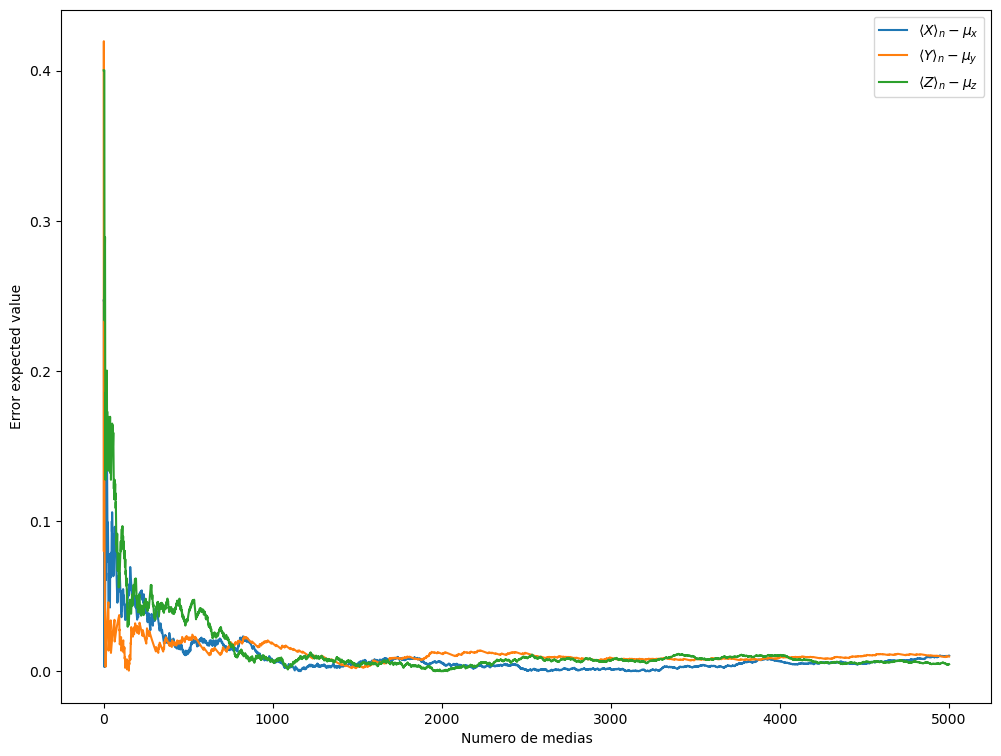

In [132]:
#Calculamos el error como la diferencia con el valor teórico conocido para la media.
Meanx=datax.mean()
Meany=datay.mean()
Meanz=dataz.mean()
for i in range(Nmedias):
    Nmean=int(nresults[i])
 
    dispmeanx[i]=np.abs(datax[:Nmean].mean()-Meanx)
    dispmeany[i]=np.abs(datay[:Nmean].mean()-Meany)
    dispmeanz[i]=np.abs(dataz[:Nmean].mean()-Meanz)

 
plt.plot(nresults,dispmeanx,label="$\\langle X\\rangle_n-\\mu_x$")
plt.plot(nresults,dispmeany,label="$\\langle Y\\rangle_n-\\mu_y$")
plt.plot(nresults,dispmeanz,label="$\\langle Z\\rangle_n-\\mu_z$")

#plt.plot(nresults,np.sqrt(varx/nresults),label="theory")
#plt.xlim([0, 50000])
#plt.ylim([0, 0.10])
plt.legend(loc="upper right")

plt.xlabel('Numero de medias')
plt.ylabel('Error expected value')

Oops! This is too noisy because of the stochasticity of the sampling. For example, sometimes it casually converges better with low N than high N. This doesn't let me check if my estimator of the mean through the sample is working correctly (unbiased, consistent).


### M2.-Sample estimator of the error of the estimator of the mean. 

So what should I do to avoid the stochasticity? The error of an estimator must always be thought as the standard deviation of such estimator. Experimentally, from a big sample one can perform several calculations of such estimator, consider it an uncorrelated sample of the possible values of such estimator, and perform its sample variance.


Thus, we have  $\bar x$ which acts as an estimator of the mean for a sample of size $N$, that is repeated $N_e$ times over different samples of size $N$, needing a total of $N\times N_e$ measurements.  

The idea is the following: 

From our set of results $\vec x= \lbrace x_i\mid i\in [1,N\times N_e]\rbrace$, we do $N_e$ packages of size $N$: 
\begin{equation}
\vec x=\lbrace \vec x_e\mid \vec x_e=\lbrace x_i\in [1+e\times N,N+e\times N]\rbrace\mid\forall e\in [1,N_e]\rbrace
\end{equation}
for each $\vec x_e$  (each one an independent sample of size N) we compute  $\bar{x_e}$, having thus $N_e$ estimations of the mean $\mu$:
\begin{equation}
\vec{\bar x}=\lbrace \bar{x_e}\mid e\in[1,N_e]\rbrace
\end{equation}
the error of the estimator $\bar x$ of size N of the mean can be *estimated*  as:
\begin{equation}
\sigma_{\bar x}(N)=\sqrt{\dfrac{1}{N_e}\sum_e^{N_e} (\bar x_e(N)-\mu)^2}
\end{equation}

We are estimating the error of the estimator of the mean through an estimator of the standard deviation of such estimator of the mean.

Be aware that, again, this is another estimator, the estimator of the error of the estimator, for which, in turn, we can estimate its error... and we can go on to infinity.

Lastly, take into account that in the last equation we are using the theoretical knowledge of the mean of the underlying distribution $\mu$. 

If we did not have access to this kind of information, how could we estimate the error of the estimator of the mean? 


## Estimator $\mu$ as a function of random variables with underlying distribution and its variance

How do we know the sample mean is a good estimator of the distribution mean?  Let me digress a bit with some theoretical aspects that you alredy know.

We define a function $S_\mu=\dfrac{\sum_i^{N} x_i}{N}$ of $\vec x$ random variables resulting from a certain distribution. Its expected value provides the first moment independently of the sample size $E(S_\mu)=\dfrac{N E(x)}{N}=\mu\forall N$, being, thus, an **unbiased** estimator.

Its variance goes as:

$
Var(S_\mu)=E(S_\mu^2)-E(S_\mu)^2=\dfrac{1}{N^2}E(\sum_{ij}^N x_ix_j)-\mu^2=\dfrac{N(N-1)}{N^2}\mu^2+\dfrac{N}{N^2}E(x^2)-\mu^2=\dfrac{E(x^2)-E(x)^2}{N}=\dfrac{\sigma^2}{N}
$

and therefore its standard deviation should go as:

$\sigma_{S_\mu}=\sqrt{Var(S_\mu)}=\dfrac{\sigma}{\sqrt{N}}$

which fulfils

$\lim_{N\rightarrow\infty}\sigma_{S_\mu}=0$
being therefore also a **consistent** estimator.

Now we already know the correct theoretical way of estimating the error of the estimator of the mean: we must estimate $\sigma_{S_\mu}$. Is it enough to estimate $Var{S_\mu}$ and perform its square root? Might be a tricky question. 



### The proper way to compute the error of the mean.
With the following code we verify such dependence of the error of the estimator of the mean on the number of elements considered for the average.

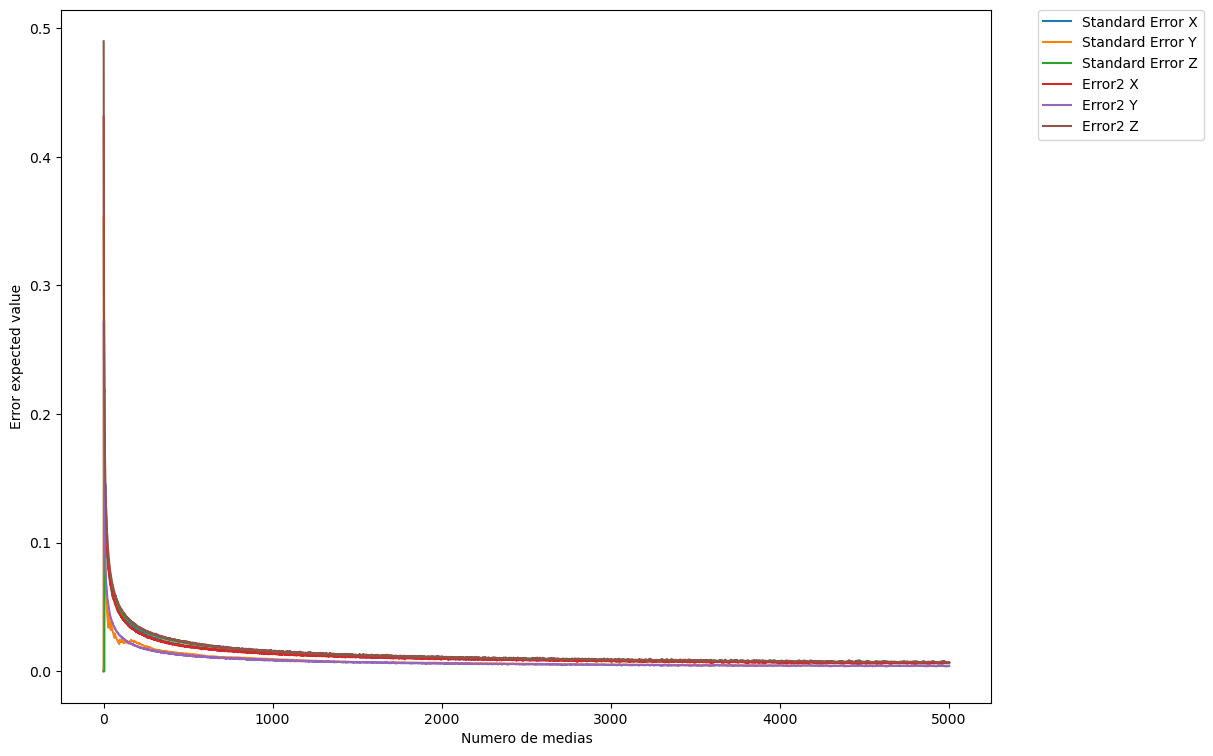

In [135]:
Npoints=500000
Nmedias=5000
avmeanx=np.zeros(Nmedias)
avmeany=np.zeros(Nmedias)
avmeanz=np.zeros(Nmedias)
avmeanx2=np.zeros(Nmedias)
avmeany2=np.zeros(Nmedias)
avmeanz2=np.zeros(Nmedias)
dispmeanx=np.zeros(Nmedias)
dispmeany=np.zeros(Nmedias)
dispmeanz=np.zeros(Nmedias)

divisionsize=int(Npoints/100/Nmedias)
nresults=np.linspace(divisionsize,Npoints/100,Nmedias)


for i in range(Nmedias):
    Nmean=int(nresults[i])
    Numeropaquetes=int(Npoints/Nmean)
    for j in range(Numeropaquetes):
        #We consider an average of the measures to represent one point of the distribution. This smoothes the 
        #system
        avmeanx2[i]+=(datax[j*Nmean:(j+1)*Nmean].mean())**2/Numeropaquetes
        avmeany2[i]+=(datay[j*Nmean:(j+1)*Nmean].mean())**2/Numeropaquetes
        avmeanz2[i]+=(dataz[j*Nmean:(j+1)*Nmean].mean())**2/Numeropaquetes
        avmeanx[i]+=(datax[j*Nmean:(j+1)*Nmean].mean())/Numeropaquetes
        avmeany[i]+=(datay[j*Nmean:(j+1)*Nmean].mean())/Numeropaquetes
        avmeanz[i]+=(dataz[j*Nmean:(j+1)*Nmean].mean())/Numeropaquetes
    #Se hacen las raices cuadradas. ¿Quizás esto sea un problema? ¿Es el estimador de la raíz  de una magnitud la raíz del estimador de la misma?
    dispmeanx[i]=np.sqrt(avmeanx2[i]-avmeanx[i]**2)
    dispmeany[i]=np.sqrt(avmeany2[i]-avmeany[i]**2)
    dispmeanz[i]=np.sqrt(avmeanz2[i]-avmeanz[i]**2)
    
    errormean2x[i]=np.sqrt((0.25-(datax[:Nmean].mean())**2)/(Nmean))
    errormean2y[i]=np.sqrt((0.25-(datay[:Nmean].mean())**2)/(Nmean))
    errormean2z[i]=np.sqrt((0.25-(dataz[:Nmean].mean())**2)/(Nmean))
    
plt.plot(nresults,errormean2x,label="Standard Error X")
plt.plot(nresults,errormean2y,label="Standard Error Y")
plt.plot(nresults,errormean2z,label="Standard Error Z")

    
    
#Ploteo de resultados
plt.plot(nresults,dispmeanx,label="Error2 X")
plt.plot(nresults,dispmeany,label="Error2 Y")
plt.plot(nresults,dispmeanz,label="Error2 Z")

plt.xlabel('Numero de medias')
plt.ylabel('Error expected value')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left', borderaxespad=0.)

Zooming in a bit to see how well it fits...

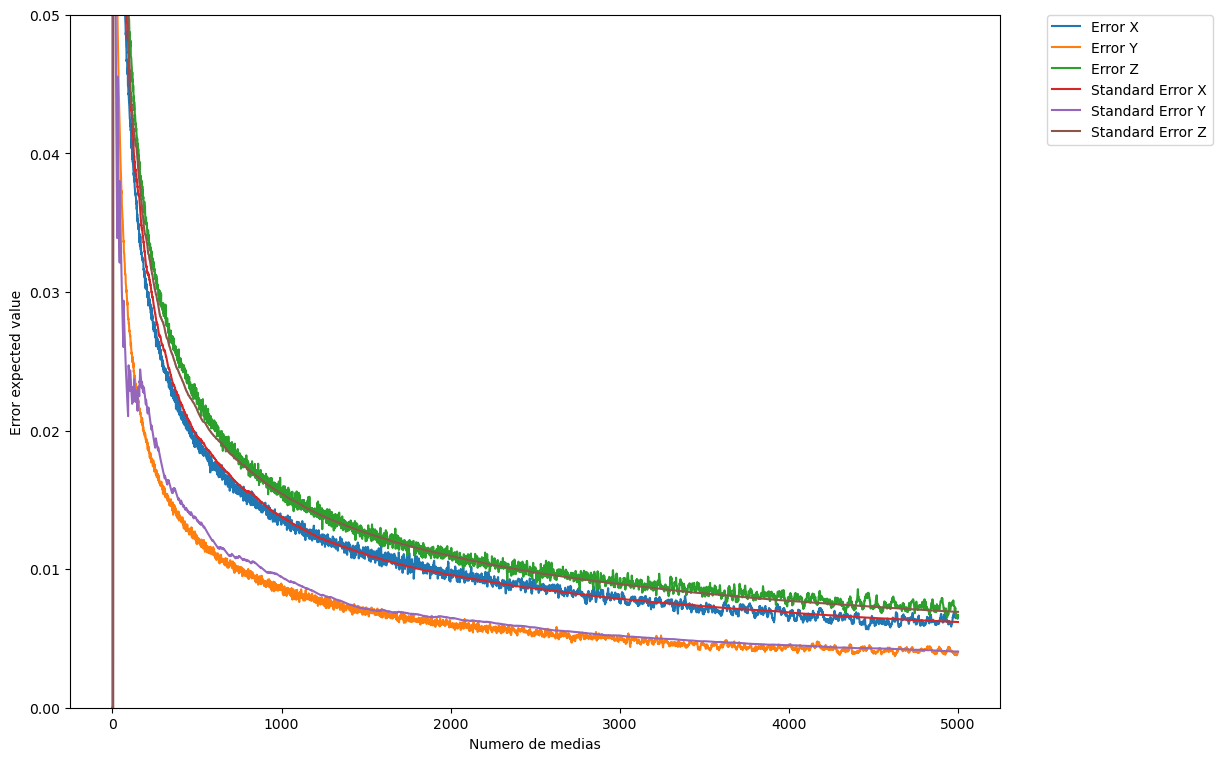

In [134]:
plt.ylim(0,0.05)

plt.plot(nresults,dispmeanx,label="Error X")
plt.plot(nresults,dispmeany,label="Error Y")
plt.plot(nresults,dispmeanz,label="Error Z")

plt.plot(nresults,errormean2x,label="Standard Error X")
plt.plot(nresults,errormean2y,label="Standard Error Y")
plt.plot(nresults,errormean2z,label="Standard Error Z")

plt.xlabel('Numero de medias')
plt.ylabel('Error expected value')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left', borderaxespad=0.)